In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN

In [2]:
crime=pd.read_csv(r'C:\Users\bivin\OneDrive\Desktop\crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# DBSCAN

In [4]:
from sklearn.cluster import DBSCAN

In [6]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
norm=mm.fit_transform(crime.iloc[:,1:])
norm

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [5]:
## we need to find the optimal values for 'eps' adn 'min_samples'
from sklearn.neighbors import NearestNeighbors

In [7]:
neigh=NearestNeighbors(n_neighbors=3).fit(norm)

In [21]:
d,index=neigh.kneighbors(norm)


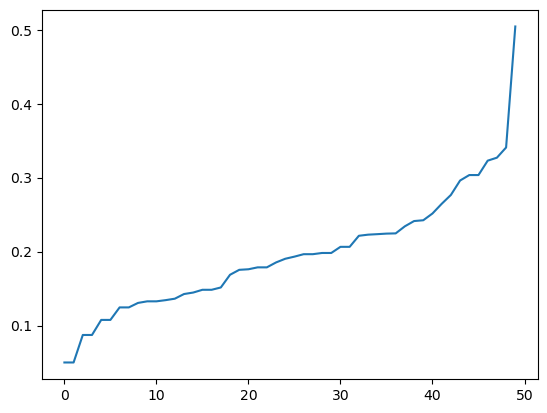

In [10]:
dist=np.sort(d[:,1])
plt.plot(dist)
plt.show()

In [22]:
# from the above plot taking the 'eps' value 0.20
db=DBSCAN(eps=0.20,min_samples=4)

In [17]:
predict11=db.fit_predict(norm)

In [19]:
predict11

array([ 0, -1,  1,  1, -1, -1,  1, -1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [23]:
crime['cluster DBSCAN']=predict11

In [24]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster DBSCAN
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [30]:
# Analysing the  cluster
crime.groupby('cluster DBSCAN').agg('mean')

C:\Users\bivin\AppData\Local\Temp\ipykernel_19148\2654248360.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime.groupby('cluster DBSCAN').agg('mean')


,Murder,Assault,UrbanPop,Rape
cluster DBSCAN,,,,
-1,10.066667,261.333333,75.000000,36.250000
0,14.671429,251.285714,54.285714,21.685714
1,6.116216,140.837838,66.135135,18.710811


In [25]:
## checking silhoutte score
from sklearn.metrics import silhouette_score
silhouette_score(norm,predict11)

0.2473858809927262

In [26]:
# states in cluster -1
crime[crime['cluster DBSCAN']==-1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster DBSCAN
1,Alaska,10.0,263,48,44.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
27,Nevada,12.2,252,81,46.0,-1


In [27]:
# states in cluster 0
crime[crime['cluster DBSCAN']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster DBSCAN
0,Alabama,13.2,236,58,21.2,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [28]:
# states in cluster 1
crime[crime['cluster DBSCAN']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster DBSCAN
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
10,Hawaii,5.3,46,83,20.2,1
11,Idaho,2.6,120,54,14.2,1
12,Illinois,10.4,249,83,24.0,1
13,Indiana,7.2,113,65,21.0,1
14,Iowa,2.2,56,57,11.3,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1


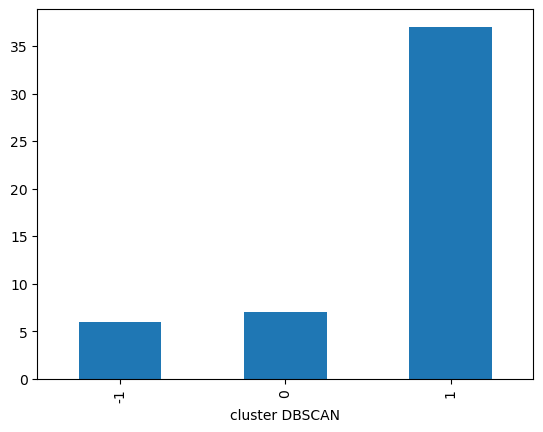

In [33]:
crime.groupby(['cluster DBSCAN']).count()['Unnamed: 0'].plot(kind='bar')
plt.show()